<a href="https://colab.research.google.com/github/VaishnaviKrishnamoorthy/Customer_Conversion_prediction/blob/main/project_Customer_Conversion_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
df1 = pd.read_excel("/content/Customer Conversion Prediction.xlsx")

In [152]:
df = df1.copy()

In [153]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,management,married,tertiary,unknown,5.0,may,261.0,1.0,unknown,no
1,44.0,technician,single,secondary,unknown,5.0,may,151.0,1.0,unknown,no
2,33.0,entrepreneur,married,secondary,unknown,5.0,may,76.0,1.0,unknown,no
3,47.0,blue-collar,married,unknown,unknown,5.0,may,92.0,1.0,unknown,no
4,33.0,unknown,single,unknown,unknown,5.0,may,198.0,1.0,unknown,no


In [154]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,management,married,tertiary,unknown,5.0,may,261.0,1.0,unknown,no
1,44.0,technician,single,secondary,unknown,5.0,may,151.0,1.0,unknown,no
2,33.0,entrepreneur,married,secondary,unknown,5.0,may,76.0,1.0,unknown,no
3,47.0,blue-collar,married,unknown,unknown,5.0,may,92.0,1.0,unknown,no
4,33.0,unknown,single,unknown,unknown,5.0,may,198.0,1.0,unknown,no


In [155]:
print("The original dataset has {} rows and {} columns".format(df.shape[0], df.shape[1]))

The original dataset has 45211 rows and 11 columns


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             45211 non-null  float64
 1   job             45211 non-null  object 
 2   marital         45211 non-null  object 
 3   education_qual  45211 non-null  object 
 4   call_type       45211 non-null  object 
 5   day             45211 non-null  float64
 6   mon             45211 non-null  object 
 7   dur             45211 non-null  float64
 8   num_calls       45211 non-null  float64
 9   prev_outcome    45211 non-null  object 
 10  y               45211 non-null  object 
dtypes: float64(4), object(7)
memory usage: 3.8+ MB


In [157]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
dur,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
num_calls,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0


# **Data Cleaning**

**Checking duplicates in the data**

In [158]:
df.duplicated().sum()

6

In [159]:
df[df.duplicated()]

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
6893,34.0,services,married,secondary,unknown,28.0,may,124.0,1.0,unknown,no
8138,29.0,admin.,single,secondary,unknown,2.0,jun,121.0,4.0,unknown,no
11630,39.0,blue-collar,married,primary,unknown,19.0,jun,112.0,4.0,unknown,no
13400,36.0,blue-collar,married,secondary,cellular,9.0,jul,183.0,1.0,unknown,no
19826,36.0,management,married,tertiary,cellular,8.0,aug,75.0,2.0,unknown,no
19854,32.0,technician,single,tertiary,cellular,8.0,aug,31.0,2.0,unknown,no


In [160]:
df = df.drop_duplicates().reset_index(drop=True)

In [161]:
df.tail()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
45200,51.0,technician,married,tertiary,cellular,17.0,nov,977.0,3.0,unknown,yes
45201,71.0,retired,divorced,primary,cellular,17.0,nov,456.0,2.0,unknown,yes
45202,72.0,retired,married,secondary,cellular,17.0,nov,1127.0,5.0,success,yes
45203,57.0,blue-collar,married,secondary,telephone,17.0,nov,508.0,4.0,unknown,no
45204,37.0,entrepreneur,married,secondary,cellular,17.0,nov,361.0,2.0,other,no


In [162]:
print("Now the dataset has {} rows and {} columns after dropping duplicates".format(df.shape[0], df.shape[1]))

Now the dataset has 45205 rows and 11 columns after dropping duplicates


# **Target column**

In [163]:
df.rename(columns = {'y':'insurance_stat'}, inplace = True)

In [164]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'insurance_stat'],
      dtype='object')

In [165]:
target_count = df['insurance_stat'].value_counts()
print('Class No:', target_count[0])
print('Class yes:', target_count[1])
print("The percentage of data where insurance is not given:", ((df['insurance_stat']=='no').sum()/df.shape[0])*100)

Class No: 39916
Class yes: 5289
The percentage of data where insurance is not given: 88.29996681782988


Class 0: 39916
Class 1: 5289
Proportion of class 0 is  88.3 %
Proportion of class 1 is  11.7 %


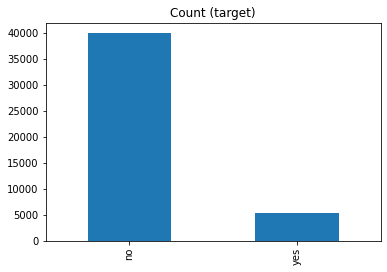

In [166]:
target_count = df ['insurance_stat'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion of class 0 is ', round(target_count[0] * 100 / (target_count[1] + target_count[0]), 2),'%')
print('Proportion of class 1 is ', round(target_count[1] * 100 / (target_count[0] + target_count[1]), 2),'%')
target_count.plot(kind='bar', title='Count (target)');

We can see that the data is **imbalanced**. where 88 percent of data belongs to one class.

# **age**

In [167]:
df['age'][0]

58.0

In [168]:
df['age'].isnull().sum() # No null values

0

**Converting datatype to integer**

In [169]:
df['age'] = df['age'].astype('int64')

In [170]:
df['age'].unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88])

In [171]:
len(df['age'].unique())

77

In [172]:
df['age'].describe()

count    45205.000000
mean        40.937087
std         10.619130
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Visualising outliers')

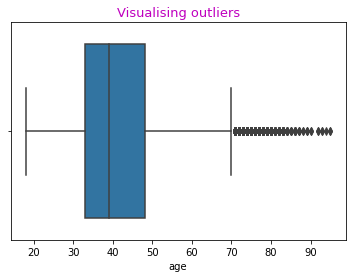

In [173]:
sns.boxplot('age',data=df)
plt.title("Visualising outliers",color='m',size=13)

There are many outliers in the data, But i am not going to remove them or cap them. Because there loan can be given to any age people.

# **job**

In [174]:
df['job'].isnull().sum() # No null values

0

In [175]:
df['job'][0] #Data is in string format.So it is in correct format only

'management'

In [176]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [177]:
(df['job']=='unknown').sum()

288

In [178]:
df[df['job']=='unknown']

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,insurance_stat
4,33,unknown,single,unknown,unknown,5.0,may,198.0,1.0,unknown,no
216,47,unknown,married,unknown,unknown,5.0,may,338.0,2.0,unknown,no
354,59,unknown,divorced,unknown,unknown,5.0,may,347.0,3.0,unknown,no
876,37,unknown,single,unknown,unknown,7.0,may,131.0,1.0,unknown,no
1072,29,unknown,single,primary,unknown,7.0,may,50.0,2.0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
44708,45,unknown,married,tertiary,cellular,7.0,sep,314.0,1.0,unknown,yes
44736,64,unknown,married,unknown,telephone,9.0,sep,378.0,4.0,unknown,no
44964,28,unknown,single,unknown,cellular,11.0,oct,450.0,1.0,success,yes
45135,77,unknown,married,unknown,telephone,8.0,nov,207.0,1.0,success,no


In [179]:
print("The percentage of unknown data is:", ((df['job']=='unknown').sum()/df.shape[0])*100)

The percentage of unknown data is: 0.6370976661873686


Only 0.6% of data is unknown in the job feature is unknown, so i decided to drop the unknown values in the feature

In [180]:
df = df.drop(df[df['job']=='unknown'].index).reset_index(drop=True)

In [181]:
df.tail()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,insurance_stat
44912,51,technician,married,tertiary,cellular,17.0,nov,977.0,3.0,unknown,yes
44913,71,retired,divorced,primary,cellular,17.0,nov,456.0,2.0,unknown,yes
44914,72,retired,married,secondary,cellular,17.0,nov,1127.0,5.0,success,yes
44915,57,blue-collar,married,secondary,telephone,17.0,nov,508.0,4.0,unknown,no
44916,37,entrepreneur,married,secondary,cellular,17.0,nov,361.0,2.0,other,no


In [182]:
print("Now the dataset has {} rows and {} columns after dropping unknown values in job".format(df.shape[0], df.shape[1]))

Now the dataset has 44917 rows and 11 columns after dropping unknown values in job


In [183]:
df['job'].replace("admin.","admin",inplace=True)

In [184]:
df['job'].value_counts()

blue-collar      9730
management       9457
technician       7596
admin            5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: job, dtype: int64

# **marital**

In [185]:
df['marital'].isnull().sum()

0

In [186]:
df['marital'][0] #Data is in correct format only

'married'

In [187]:
df['marital'].value_counts()

married     27007
single      12720
divorced     5190
Name: marital, dtype: int64

There are no spellig mistakes in this feature and no null value. so cleaning is not required.

# **education_qual**

In [188]:
df['education_qual'].isnull().sum()

0

In [189]:
df['education_qual'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [190]:
df['education_qual'].value_counts()

secondary    23128
tertiary     13260
primary       6799
unknown       1730
Name: education_qual, dtype: int64

In [191]:
print("The percentage of unknown data is:", ((df['education_qual']=='unknown').sum()/df.shape[0])*100)

The percentage of unknown data is: 3.8515484115145715


As we canot correctly fill the educational values of unknown people. 3 percent of data is not do big, so i am going to drop those values.

In [192]:
df = df.drop(df[df['education_qual']=='unknown'].index).reset_index(drop=True)

In [193]:
df.tail()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,insurance_stat
43182,51,technician,married,tertiary,cellular,17.0,nov,977.0,3.0,unknown,yes
43183,71,retired,divorced,primary,cellular,17.0,nov,456.0,2.0,unknown,yes
43184,72,retired,married,secondary,cellular,17.0,nov,1127.0,5.0,success,yes
43185,57,blue-collar,married,secondary,telephone,17.0,nov,508.0,4.0,unknown,no
43186,37,entrepreneur,married,secondary,cellular,17.0,nov,361.0,2.0,other,no


In [194]:
df['education_qual'].value_counts()

secondary    23128
tertiary     13260
primary       6799
Name: education_qual, dtype: int64

In [195]:
print("Now the dataset has {} rows and {} columns after dropping unknown values in educational qualifications".format(df.shape[0], df.shape[1]))

Now the dataset has 43187 rows and 11 columns after dropping unknown values in educational qualifications


# **call_type**

In [196]:
df['call_type'].isnull().sum() # No null values in the data

0

In [197]:
df['call_type'].value_counts()

cellular     28210
unknown      12283
telephone     2694
Name: call_type, dtype: int64

In [198]:
print("The percentage of unknown data is:", ((df['call_type']=='unknown').sum()/df.shape[0])*100)

The percentage of unknown data is: 28.441429133767105


so much of data is unknow, i decided to drop the feature

In [199]:
df.drop(['call_type'],axis=1,inplace=True)

In [200]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'day', 'mon', 'dur',
       'num_calls', 'prev_outcome', 'insurance_stat'],
      dtype='object')

# **day**

In [201]:
df['day'].isnull().sum()

0

In [202]:
df['day'][0]

5.0

In [203]:
df['day'] = df['day'].astype('int64')

In [204]:
df['day'].value_counts()

20    2628
18    2227
21    1961
17    1872
6     1817
5     1796
14    1784
8     1758
7     1739
28    1739
29    1661
19    1656
15    1649
12    1542
13    1529
9     1483
30    1481
11    1397
4     1372
16    1331
2     1243
27    1072
3     1039
26     994
23     900
22     875
25     810
31     597
10     504
24     426
1      305
Name: day, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Visualising outliers')

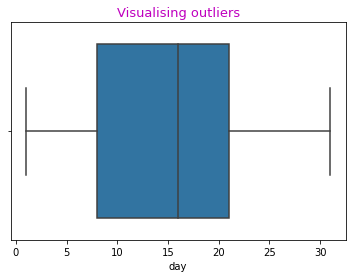

In [205]:
sns.boxplot('day',data=df)
plt.title("Visualising outliers",color='m',size=13)

No outliers in the data.

# **mon**



In [206]:
df['mon'].isnull().sum()

0

In [207]:
df['mon'][0]

'may'

In [208]:
df['mon'].value_counts()

may    13191
jul     6600
aug     6035
jun     4978
nov     3842
apr     2820
feb     2533
jan     1318
oct      690
sep      532
mar      448
dec      200
Name: mon, dtype: int64

# **dur**

In [209]:
df['dur'].isnull().sum()

0

In [210]:
df['dur'][0]

261.0

In [211]:
df['dur'] = df['dur'].astype('int64')

As duration is in seconds, we don't need milli seconds, so converting to integer.

In [212]:
(df['dur']==0).sum()

3

duration=0, means may be the person didn't lift the call. So i am not treating it as a null value.

In [213]:
print("Minimum duration of call is:",(df['dur']).min(),"sec")
print("Maximum duration of call is:",(df['dur']).max(),"sec")

Minimum duration of call is: 0 sec
Maximum duration of call is: 4918 sec


In [214]:
df['dur'].value_counts()

124     176
90      172
89      172
114     172
122     169
       ... 
1327      1
1331      1
1608      1
1833      1
1556      1
Name: dur, Length: 1558, dtype: int64

In [215]:
df['dur'].describe()

count    43187.000000
mean       258.344340
std        258.173244
min          0.000000
25%        103.000000
50%        180.000000
75%        318.000000
max       4918.000000
Name: dur, dtype: float64

There are outliers, but i am not going to clean them. Beacause a person can talk for how much time they need.

# **num_calls**

In [216]:
df['num_calls'].isnull().sum()

0

In [217]:
df['num_calls'][0]

1.0

number of contacts performed during this campaign for the client should be integer, so converting data type.

In [218]:
df['num_calls'] = df['num_calls'].astype('int64')

In [219]:
df['num_calls'].unique()

array([ 1,  2,  3,  5,  4,  7,  8,  6,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 41, 26, 28, 55, 50, 38, 23, 20,
       29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44])

In [220]:
(df['num_calls']==0).sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Visualising outliers')

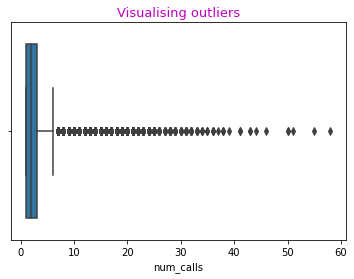

In [221]:
sns.boxplot('num_calls',data=df)
plt.title("Visualising outliers",color='m',size=13)

There are outliers, but i am not going to clean them. Beacause there can be many number of calls

# **prev_outcome**

In [222]:
df['prev_outcome'].isnull().sum()

0

In [223]:
df['prev_outcome'][0]

'unknown'

In [224]:
df['prev_outcome'].value_counts()

unknown    35280
failure     4709
other       1774
success     1424
Name: prev_outcome, dtype: int64

In [225]:
print("The percentage of unknown data is:", ((df['prev_outcome']=='unknown').sum()/df.shape[0])*100)

The percentage of unknown data is: 81.69124968161715


As 81 percent of data is missing, i am going to drop this feature.

In [226]:
df.drop(['prev_outcome'],axis=1,inplace=True)

In [227]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'day', 'mon', 'dur',
       'num_calls', 'insurance_stat'],
      dtype='object')

# **EDA**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


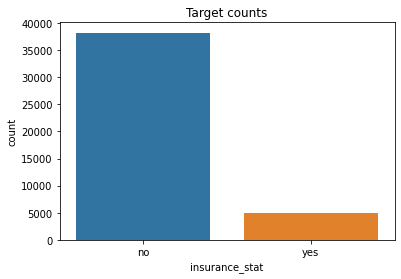

In [228]:
sns.countplot(df['insurance_stat'])
plt.title("Target counts")
plt.show()

# **job**

In [229]:
df_ins_yes = df[df['insurance_stat']=='yes']
df_ins_no = df[df['insurance_stat']=='no']

In [230]:
def feature(feature):
  plt.subplot(2,2,1)
  sns.countplot(df[feature],order = df[feature].value_counts().index[::-1])
  plt.title("Countplot of "+ feature,size=15)
  plt.xticks(rotation=60)
  plt.subplot(2,2,2)
  sns.countplot(x=feature,hue='insurance_stat',data=df,order=df[feature].value_counts().index[::-1])
  plt.title("Distribution of "+feature,size=15)
  plt.xticks(rotation=60)
  plt.subplot(2,2,3)
  sns.countplot(df_ins_yes[feature],order=df_ins_yes[feature].value_counts().index[::-1])
  plt.title(feature + " vs (target variable==yes)",size=15)
  plt.xticks(rotation=60)
  plt.subplot(2,2,4)  
  sns.countplot(df_ins_no[feature],order=df_ins_no[feature].value_counts().index[::-1])
  plt.title(feature + " vs (target variable==no)",size=15)
  plt.xticks(rotation=60)
  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


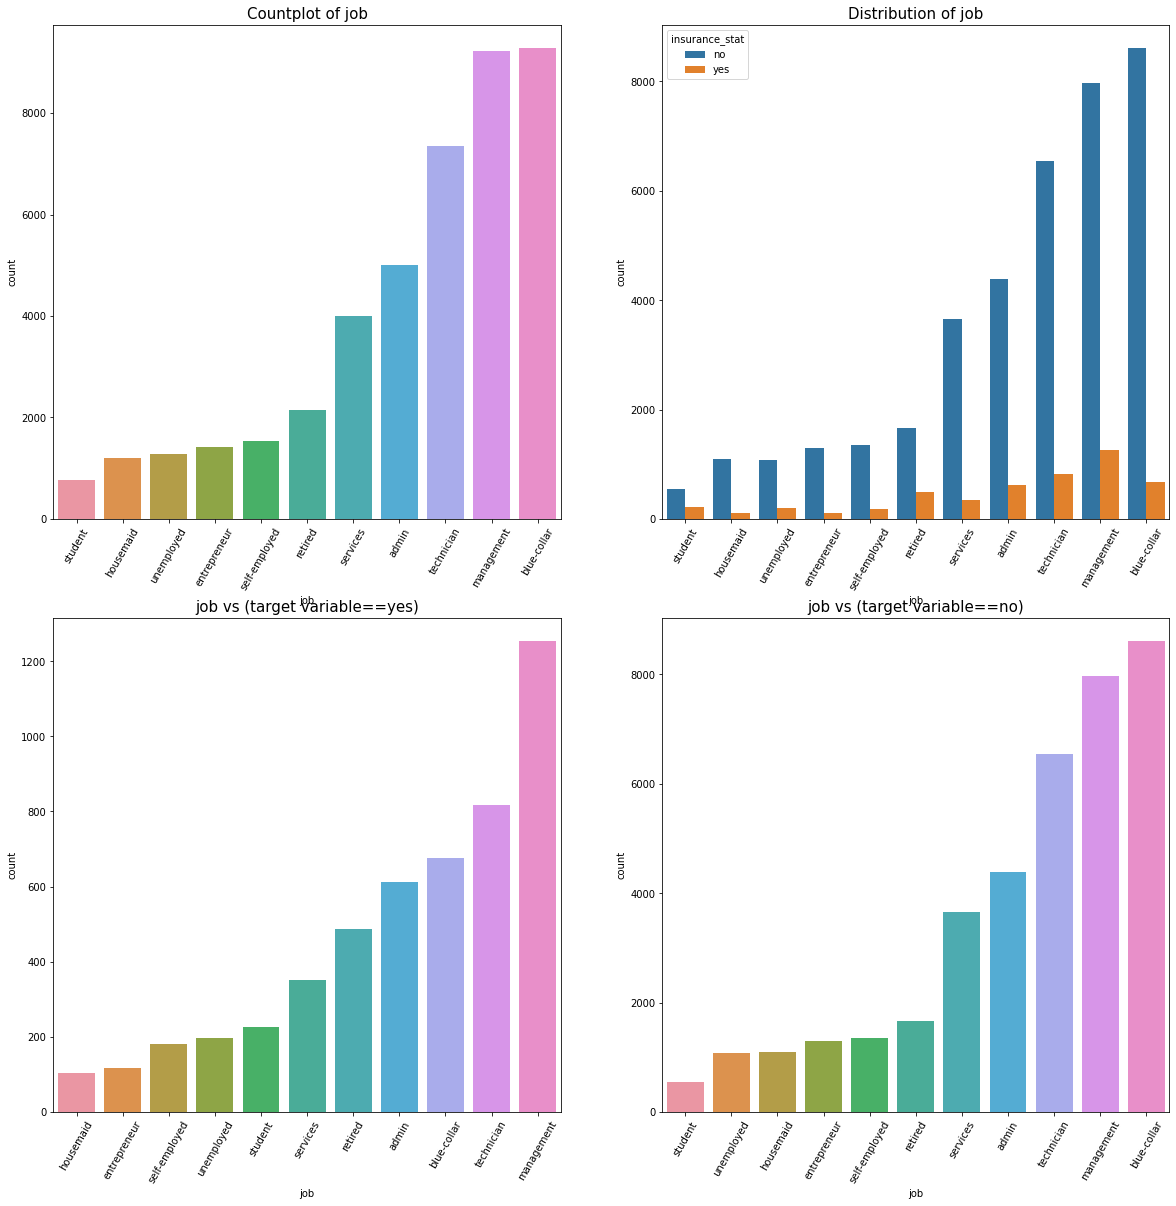

In [231]:
plt.figure(figsize=(20,20))
feature("job")

1.   The most targeted customers: Blue-collar job, but comparing with conversion rate, we end up in losing lot of money.(Better to avoid targetting Blue-collar customers a lot) 
2.   Convertion rate is maximum: Management.
3.   we need to target students also, as we can see from graphs that we put in very little time to target students, but their conversion rate is.average.(More than housemaid, entrepreneur, self employed and unemployed)


# **MARITAL**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


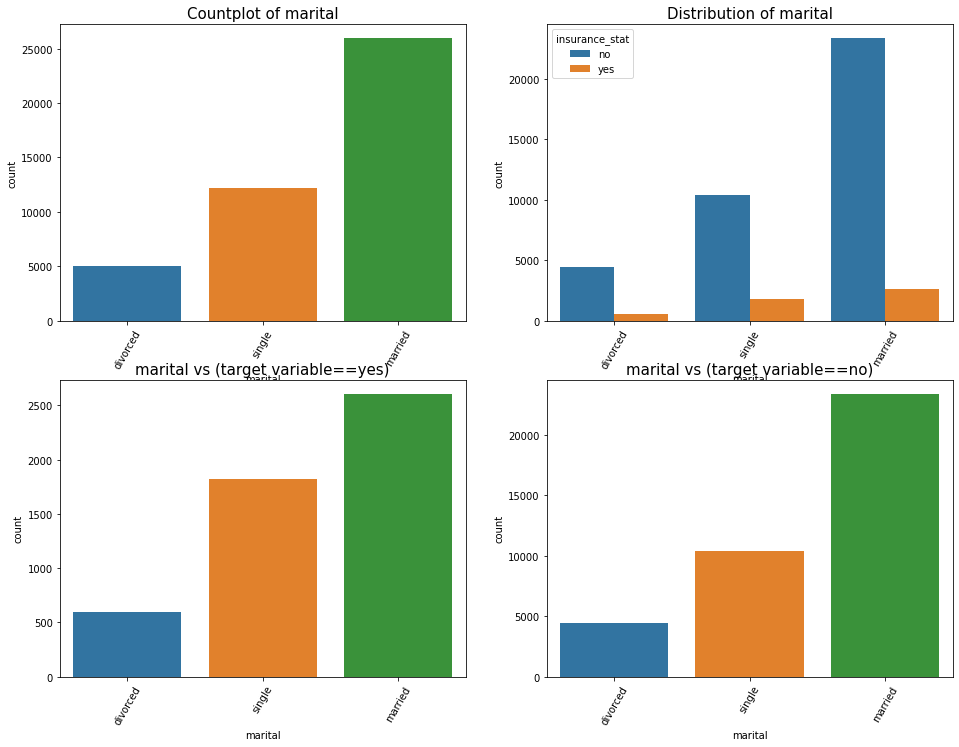

In [232]:
plt.figure(figsize=(16,12))
feature("marital")

1. Married people are mostly opting for the insurance.
2. Divorced people are at low.

# **education_qual**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


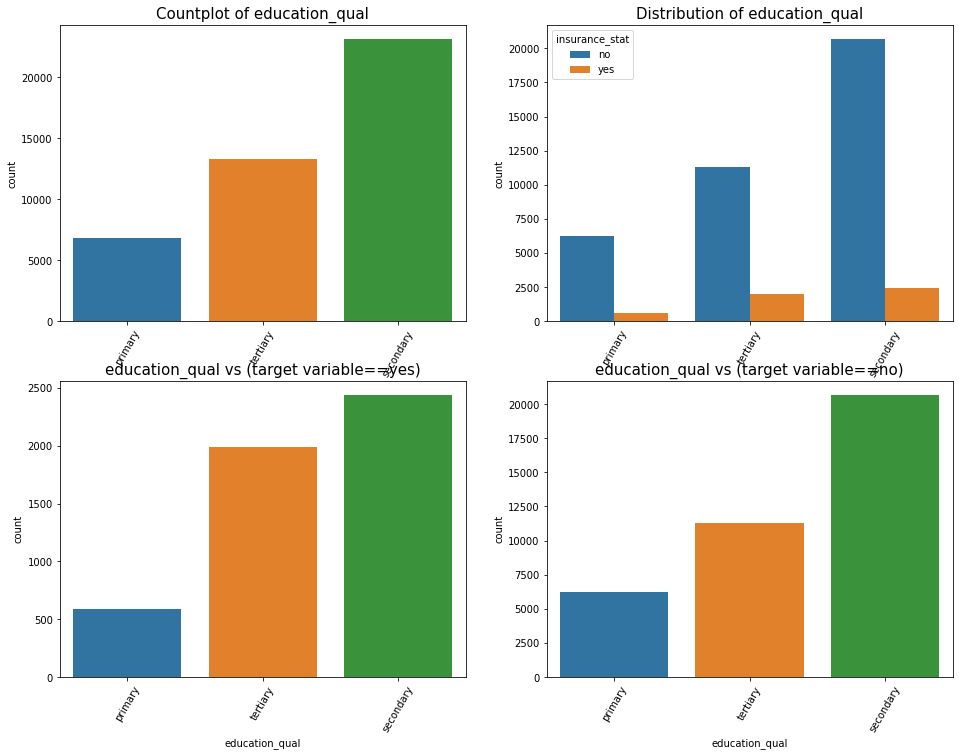

In [233]:
plt.figure(figsize=(16,12))
feature("education_qual")

1. People with higher education(Secondary/Tertiary --> Collage/Masters) are opting for insurance plans.
2. We need to concentrate on spreading awareness about health insurance to people with less education.

# **mon**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


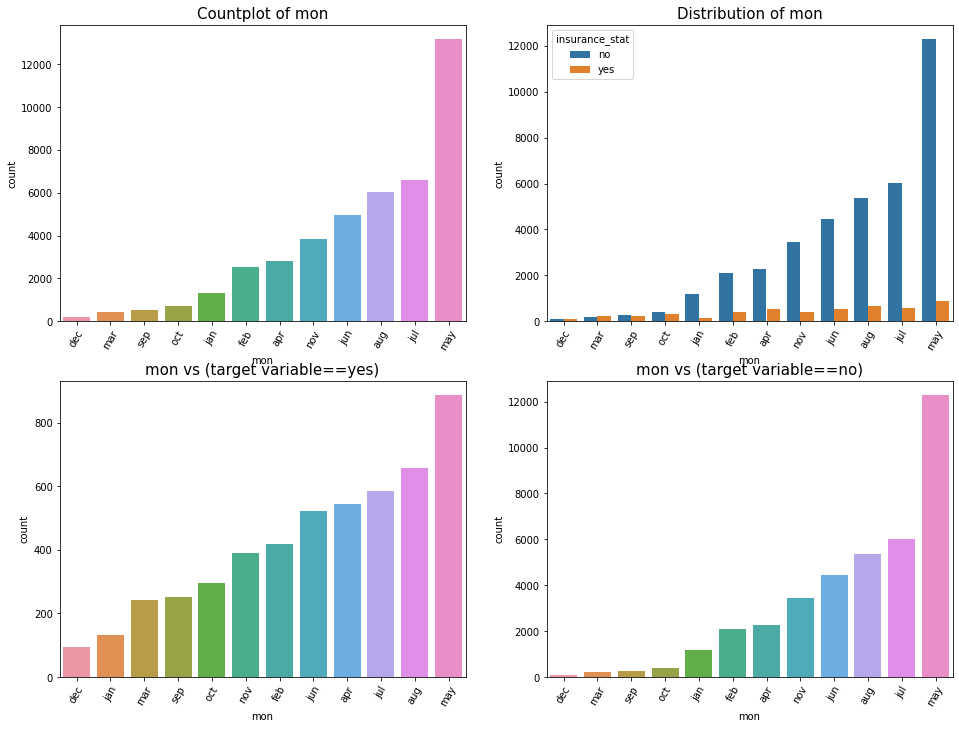

In [234]:
plt.figure(figsize=(16,12))
feature("mon")

1. People opting for Insurance plans when targeted during start of new financial year/When they get their appraisal cycle result.

In [235]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'day', 'mon', 'dur',
       'num_calls', 'insurance_stat'],
      dtype='object')

In [236]:
df['num_calls'].dtypes

dtype('int64')

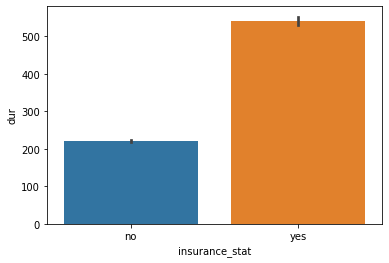

In [237]:
ax = sns.barplot(x='insurance_stat',y='dur',data=df)

If the call duration high getting loan are also high.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


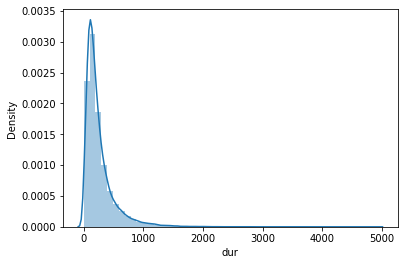

In [238]:
sns.distplot(df['dur'])

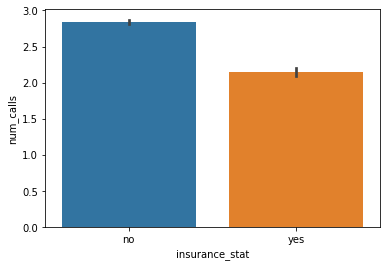

In [239]:
ax = sns.barplot(x='insurance_stat',y='num_calls',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


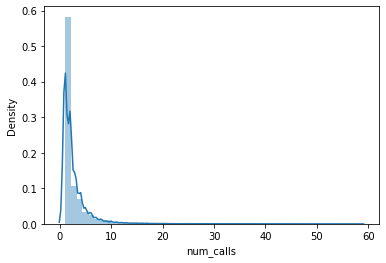

In [240]:
sns.distplot(df['num_calls'])

# **Encoding**

In [241]:
df['insurance_stat'] = df['insurance_stat'].map({'yes':1,'no':0})

In [242]:
df['insurance_stat'].value_counts()

0    38166
1     5021
Name: insurance_stat, dtype: int64

In [243]:
df.marital = df.marital.map({'divorced':0, 'single':1, 'married':2})
df.education_qual = df.education_qual.map({'primary':0, 'tertiary':1, 'secondary':2})
df.mon = df.mon.map({'dec': 1, 'jan': 2, 'mar' : 3, 'sep' : 4, 'oct' : 5, 'nov' : 6, 'feb' : 7, 'jun' : 8, 'apr' : 9, 'jul' : 10, 'aug' : 11, 'may' :12})

In [244]:
df['job'] = df['job'].map({'management':9, 'technician':7, 'entrepreneur':3, 'retired':5, 'admin':7,
       'services':6, 'blue-collar':10, 'self-employed':4, 'unemployed':2,
       'housemaid':1, 'student':0})

In [245]:
#df=pd.get_dummies(df,columns=["job"],prefix='job')

In [246]:
df.dtypes

age               int64
job               int64
marital           int64
education_qual    int64
day               int64
mon               int64
dur               int64
num_calls         int64
insurance_stat    int64
dtype: object

# **Data preparation and splitting**

In [247]:
X = df[['age', 'marital', 'education_qual', 'day', 'mon', 'dur', 'num_calls',
       'job']].values
y = df['insurance_stat'].values

In [248]:
original_feature = df[['age', 'marital', 'education_qual', 'day', 'mon', 'dur', 'num_calls',
       'job']]

In [249]:
print(f"Independent features has {X.shape[0]} rows and {X.shape[1]} columns")
print(f"Dependent features has {y.shape[0]} rows and 1 column")

Independent features has 43187 rows and 8 columns
Dependent features has 43187 rows and 1 column


In [250]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [251]:
print("The shape of X train:", X_train.shape)
print("The shape of X test:", X_test.shape)
print("The shape of y train:", y_train.shape)
print("The shape of y test:", y_test.shape)

The shape of X train: (34549, 8)
The shape of X test: (8638, 8)
The shape of y train: (34549,)
The shape of y test: (8638,)


# **Scaling the data and Balancing the data**

In [252]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train) 
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)  

In [253]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Over-sampling followed by under-sampling**

Now, we will do a combination of over-sampling and under-sampling, using the SMOTE and Tomek links techniques:

In [254]:
from imblearn.combine import SMOTEENN
smt = SMOTEENN(sampling_strategy='all')
X_smt, y_smt = smt.fit_resample(X_train_scaled, y_train)

# **Logistic regression**

In [255]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_smt,y_smt)
y_pred=lr.predict(X_test_scaled)

In [256]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1.tail()

,Actual,Predicted
8633,0,0
8634,1,1
8635,0,0
8636,0,0
8637,0,0


In [257]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve, confusion_matrix,f1_score
print(f1_score(y_test,y_pred))

0.4020833333333334


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


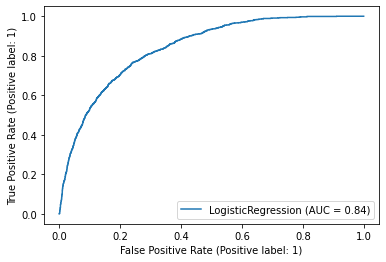

In [258]:
plot_roc_curve(lr, X_test_scaled, y_test)

# **KNN Algoritm**

In [259]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [260]:
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsClassifier(i)
  knn.fit(X_smt, y_smt) 
  print("K value  : " , i, " train score : ", knn.score(X_train_scaled, y_train) , " score : ", np.mean(cross_val_score(knn, X_train_scaled, y_train, cv=10)))

K value  :  1  train score :  0.8677241020000579  score :  0.8650320482470878
K value  :  2  train score :  0.8785493067816724  score :  0.8847143729831057
K value  :  3  train score :  0.842658253495036  score :  0.8813568781177803
K value  :  4  train score :  0.8517467944079423  score :  0.8885350150876896
K value  :  5  train score :  0.8299227184578425  score :  0.8878983238041928
K value  :  6  train score :  0.837361428695476  score :  0.8898665529259058
K value  :  7  train score :  0.8167819618512837  score :  0.8898374836700166
K value  :  8  train score :  0.8261310023444962  score :  0.8911111092489508
K value  :  9  train score :  0.8076934209383774  score :  0.8900979421916493
K value  :  10  train score :  0.8179397377637558  score :  0.891024270189055
K value  :  20  train score :  0.7960577730180324  score :  0.89015592986843
K value  :  50  train score :  0.7768676372688066  score :  0.8905321961491826


In [261]:
knn = KNeighborsClassifier(7) 
knn.fit(X_smt,y_smt)
y_pred=knn.predict(X_test_scaled)

In [262]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2.tail()

,Actual,Predicted
8633,0,0
8634,1,1
8635,0,0
8636,0,1
8637,0,0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


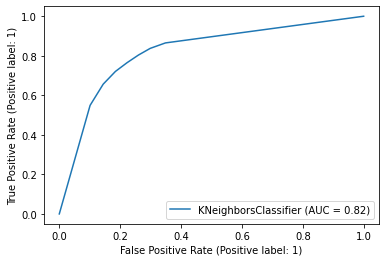

In [263]:
plot_roc_curve(knn, X_test_scaled, y_test)

# **Decission tree**

In [264]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier 
import numpy as np
for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dt = DecisionTreeClassifier(max_depth=depth) 
  dt.fit(X_smt, y_smt) 
  trainAccuracy = accuracy_score(y_train, dt.predict(X_train_scaled)) 
  dt = DecisionTreeClassifier(max_depth=depth) 
  valAccuracy = cross_val_score(dt, X_train_scaled, y_train, cv=10) 
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.635387420764711  Cross val score :  0.8829778012782427
Depth  :  2  Training Accuracy :  0.6108425714203016  Cross val score :  0.888332485584783
Depth  :  3  Training Accuracy :  0.7195577296014356  Cross val score :  0.888592977625304
Depth  :  4  Training Accuracy :  0.7221916698023098  Cross val score :  0.8949318100115893
Depth  :  5  Training Accuracy :  0.7511360676141133  Cross val score :  0.8949898060680919
Depth  :  6  Training Accuracy :  0.8010072650438508  Cross val score :  0.8955397337091918
Depth  :  7  Training Accuracy :  0.8025123737300646  Cross val score :  0.895713395069539
Depth  :  8  Training Accuracy :  0.8134823005007381  Cross val score :  0.8938608144922267
Depth  :  9  Training Accuracy :  0.8319777707024806  Cross val score :  0.89296355575071
Depth  :  10  Training Accuracy :  0.7981417696604822  Cross val score :  0.8927609759694711
Depth  :  20  Training Accuracy :  0.9034704332976352  Cross val score :  0.868795063

In [265]:
dt = DecisionTreeClassifier(max_depth=5) 
dt.fit(X_smt, y_smt)

DecisionTreeClassifier(max_depth=5)

In [266]:
y_pred = dt.predict(X_test_scaled)

In [267]:
df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df3.head()

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,1
4,0,0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


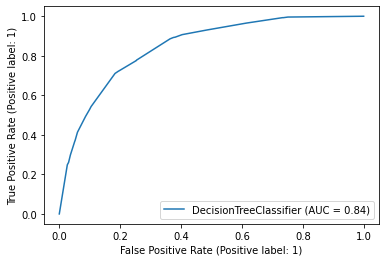

In [268]:
plot_roc_curve(dt, X_test_scaled, y_test)

# **Random forest**

In [269]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 100, max_depth = 3, max_features='sqrt')
rf.fit(X_smt,y_smt)

RandomForestClassifier(max_depth=3, max_features='sqrt')

In [270]:
y_pred = rf.predict(X_test_scaled)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [271]:
df4 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df4.head()

,Actual,Predicted
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


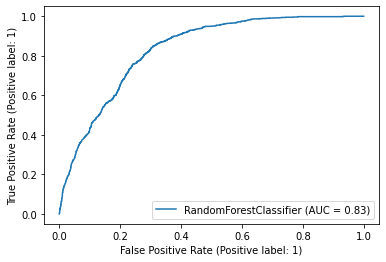

In [272]:
plot_roc_curve(rf, X_test_scaled, y_test)

# **XG boost**

In [273]:
import xgboost as xgb
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(X_smt,y_smt) #train the model
  print("Learning rate : ", lr, " Train score : ", model.score(X_train_scaled,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train_scaled, y_train, cv=10)))

Learning rate :  0.01  Train score :  0.7232047237257229  Cross-Val score :  0.8895192553443773
Learning rate :  0.02  Train score :  0.739095198124403  Cross-Val score :  0.8903007649848286
Learning rate :  0.03  Train score :  0.7555935048771311  Cross-Val score :  0.8900692751624198
Learning rate :  0.04  Train score :  0.7755651393672754  Cross-Val score :  0.8910533226854997
Learning rate :  0.05  Train score :  0.7836695707545804  Cross-Val score :  0.892847848548255
Learning rate :  0.06  Train score :  0.7958551622333497  Cross-Val score :  0.8938030782071082
Learning rate :  0.07  Train score :  0.8034096500622304  Cross-Val score :  0.8947582743470729
Learning rate :  0.08  Train score :  0.8097195287852036  Cross-Val score :  0.8958291860692148
Learning rate :  0.09  Train score :  0.8118903586210889  Cross-Val score :  0.8970738429489249
Learning rate :  0.1  Train score :  0.819531679643405  Cross-Val score :  0.8969580687086932
Learning rate :  0.11  Train score :  0.8270

In [274]:
model = xgb.XGBClassifier(learning_rate = 0.5, n_estimators=100)
model.fit(X_smt,y_smt) #train the model

XGBClassifier(learning_rate=0.5)

In [275]:
y_pred = model.predict(X_test_scaled)
y_pred

array([0, 0, 1, ..., 0, 0, 1])

In [276]:
df5 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df5.tail()

,Actual,Predicted
8633,0,0
8634,1,1
8635,0,0
8636,0,0
8637,0,1


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


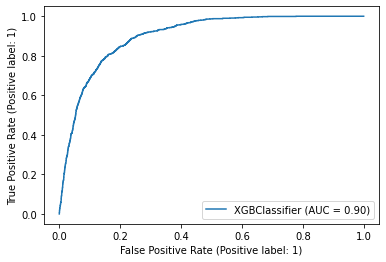

In [277]:
plot_roc_curve(model, X_test_scaled, y_test)

# **We are going to use XG Booster as our model so doing label encoding for Job feature**

# **Feature Importance**

In [278]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(original_feature.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: dur                  Importance: 0.56
Variable: mon                  Importance: 0.19
Variable: num_calls            Importance: 0.11
Variable: age                  Importance: 0.07
Variable: job                  Importance: 0.04
Variable: day                  Importance: 0.02
Variable: marital              Importance: 0.01
Variable: education_qual       Importance: 0.01


# **Importing the Best model using pickle package**

In [280]:
import pickle
filename = "Customer_conversion_model"
pickle.dump(model,open(filename,'wb'))

In [281]:
loaded_model = pickle.load(open(filename,'rb'))
loaded_model.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1])